<a href="https://colab.research.google.com/github/lisagirard/Snowsports/blob/main/CapstoneIV_SkiingHafjell_PredictiveModeling_LisaGirard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Captstone IV - Thinkful Data Science
**Febraury 1, 2023**

**Lisa Girard**
**Data Science Student**

This is an analysis of data pertaining to customer habits, intentions, behaviors, demographics, and characteristics of visitors to a Norwegian ski resort, Hafjell. 

My analysis includes [unsupervised clustered machine learning](https://colab.research.google.com/drive/1Y5Swn4KUGAMnxelNgFSrSeOontfNwLQt?usp=sharing) followed by supervised machine learning (below) to predict and identify the resulting clusters. 

<br>
Origitnal Data Source:

https://data.mendeley.com/datasets/6w4tzrs3yw


##The relative importance of ski resort- and weather-related characteristics when going alpine skiing: data from a rating-based conjoint survey

https://data.mendeley.com/datasets/6w4tzrs3yw

The data are related to two research articles: “The relative importance of ski resort-and weather-related characteristics when going alpine skiing” [1] and “Optimal pricing of alpine ski passes in the case of crowdedness and reduced skiing capacity” [2].  A rating-based conjoint survey experiment on active alpine skiers at a big ski area located in Inland Norway was performed in February of 2018 to collect the data and pertain to 400 respondents doing more than 7200 ratings. A total of ten versions of the same questionnaire type were used to obtain information about preferences on ski resort- and weather-related characteristics when going alpine skiing. We display the raw data organized such that they can be easily downloaded and used directly to either (1) replicate the analyses performed in the related research articles, or (2) run one’s own analyses on the topic of interest. The data may also be useful to lecturers teaching students about the key concepts of survey experiments and causal modelling.   

Haugom, Erik; Malasevska, Iveta; Lien, Gudbrand (2021), “The relative importance of ski resort- and weather-related characteristics when going alpine skiing: data from a rating-based conjoint survey”, Mendeley Data, V1, doi: 10.17632/6w4tzrs3yw.1

In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse

import warnings
from scipy import stats
import statistics
from scipy.stats import pearsonr
from scipy.stats.mstats import winsorize
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix

warnings.filterwarnings('ignore')

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, classification_report
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score

from sklearn.ensemble import RandomForestClassifier

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sqlalchemy import create_engine
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
import statistics
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats.mstats import winsorize
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [ ]:
master_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/SKIING/Hafjell Capstone IV/Hafjell-ski-data-csv-2018.csv")
#master_data.head()
master_data.shape

(7182, 87)

In [ ]:
clustered_all = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/SKIING/Hafjell Capstone IV/clustered_all_noindex.csv")
#clustered_all.head()
clustered_all.shape

(7182, 67)

<font color = ' red'>**OBJECTIVE: <br>CAN WE PREDICT WHAT FEATURES ARE ASSIGNED TO 4 CLUSTERS THAT CAME FROM UNSUPERVISED LEARNING?** </font>

source: https://colab.research.google.com/drive/1Y5Swn4KUGAMnxelNgFSrSeOontfNwLQt?usp=sharing

Logistic regression classification - not predicting a number here, but more of a Yes/No
  

In [ ]:
#pd.set_option('display.max_rows',None)

In [ ]:
clustered_all.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7182 entries, 0 to 7181
Data columns (total 67 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CLUSTER_ID              7182 non-null   int64  
 1   SLOPES_OPEN             7182 non-null   float64
 2   RATING                  7182 non-null   int64  
 3   QUE_1                   7182 non-null   int64  
 4   QUE_5                   7182 non-null   int64  
 5   QUE_10                  7182 non-null   int64  
 6   MIDWEEK                 7182 non-null   int64  
 7   WEEKEND                 7182 non-null   int64  
 8   REGULAR_WEEK            7182 non-null   int64  
 9   VACATION                7182 non-null   int64  
 10  P250                    7182 non-null   int64  
 11  P350                    7182 non-null   int64  
 12  P450                    7182 non-null   int64  
 13  P550                    7182 non-null   int64  
 14  P650                    7182 non-null   

**NO NULLS, ALL DATA IS INT OR FLOAT (NO OBJECTS TO ENCODE)**

Couple-Child vs Ski School Spend: COUNTS


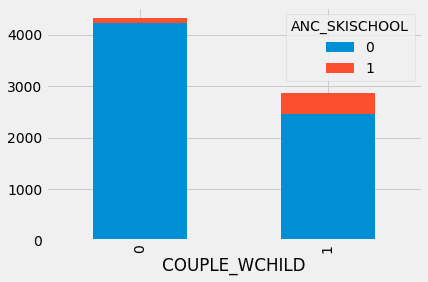

In [ ]:
pd.crosstab(clustered_all['COUPLE_WCHILD'], clustered_all['ANC_SKISCHOOL']).plot.bar(stacked=True)
print("Couple-Child vs Ski School Spend: COUNTS")

**Couple with Child should be spending more on ski school - that's a business opporutnity right there**

# MODEL TRAINING


# STANDARD LOGISTIC REGRESSION

In [ ]:
clustered_all = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/SKIING/Hafjell Capstone IV/clustered_all_noindex.csv")

In [ ]:
clustered_all.columns

Index(['CLUSTER_ID', 'SLOPES_OPEN', 'RATING', 'QUE_1', 'QUE_5', 'QUE_10',
       'MIDWEEK', 'WEEKEND', 'REGULAR_WEEK', 'VACATION', 'P250', 'P350',
       'P450', 'P550', 'P650', 'SUN', 'RAIN', 'SNOW', 'CLOUD', 'FOG', 'TEMP_C',
       'NO_WIND', 'GENTLE_BREEZE', 'FRESH_BREEZE', 'SLOPES_50', 'SLOPES_75',
       'SLOPES_100', 'MALE', 'FEMALE', 'AGE', 'HAFJELL_RESIDENCE',
       'SKIING_DAYS_TOTAL', 'SKIING_DAYS_HAFJELL', 'SKIING_MIDWEEK',
       'SKIING_WEEKEND', 'SKIING_CHRISTMAS', 'SKIING_EASTER',
       'SKIING_WINTER-VACATION', 'SKIING_REGULAR_WEEK', 'SKIING_ALL_PERIODS',
       'WORK_FULL_TIME', 'WORK_PART_TIME', 'WORK_UNEMPLOYED', 'WORK_STUDENT',
       'WORK_OTHER', 'SINGLE', 'SINGLE_WCHILD', 'COUPLE', 'COUPLE_WCHILD',
       'OTHER', 'DISTANCE', 'ANC_SKI_RENT', 'ANC_RESTAURANTS', 'ANC_SKISCHOOL',
       'ANC_CHILD_ACTIVITIES', 'ANC_SPORT_STORE', 'GEAR_ALPIN_SKI',
       'GEAR_SNOWBOARD', 'GEAR_OTHER', 'INCOME_L100', 'INCOME_100-300',
       'INCOME_300-600', 'INCOME_600-900', 'INC

In [ ]:
clustered_all['CLUSTER_ID'].value_counts().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0    2165
3    1825
2    1732
1    1460
Name: CLUSTER_ID, dtype: int64>

In [ ]:
clustered_all_80 = clustered_all.sample(frac=.80)
clustered_all_80.shape

(5746, 67)

In [ ]:
X = clustered_all_80[['SLOPES_OPEN', 'RATING', 'QUE_1', 'QUE_5', 'QUE_10',
       'MIDWEEK', 'WEEKEND', 'REGULAR_WEEK', 'VACATION', 'P250', 'P350',
       'P450', 'P550', 'P650', 'SUN', 'RAIN', 'SNOW', 'CLOUD', 'FOG', 'TEMP_C',
       'NO_WIND', 'GENTLE_BREEZE', 'FRESH_BREEZE', 'SLOPES_50', 'SLOPES_75',
       'SLOPES_100', 'MALE', 'FEMALE', 'AGE', 'HAFJELL_RESIDENCE',
       'SKIING_DAYS_TOTAL', 'SKIING_DAYS_HAFJELL', 'SKIING_MIDWEEK',
       'SKIING_WEEKEND', 'SKIING_CHRISTMAS', 'SKIING_EASTER',
       'SKIING_WINTER-VACATION', 'SKIING_REGULAR_WEEK', 'SKIING_ALL_PERIODS',
       'WORK_FULL_TIME', 'WORK_PART_TIME', 'WORK_UNEMPLOYED', 'WORK_STUDENT',
       'WORK_OTHER', 'SINGLE', 'SINGLE_WCHILD', 'COUPLE', 'COUPLE_WCHILD',
       'OTHER', 'DISTANCE', 'ANC_SKI_RENT', 'ANC_RESTAURANTS', 'ANC_SKISCHOOL',
       'ANC_CHILD_ACTIVITIES', 'ANC_SPORT_STORE', 'GEAR_ALPIN_SKI',
       'GEAR_SNOWBOARD', 'GEAR_OTHER', 'INCOME_L100', 'INCOME_100-300',
       'INCOME_300-600', 'INCOME_600-900', 'INCOME_900-1200', 'INCOME_M1200',
       'INCOME_NOANSWER', 'SKI_INTEREST']]

In [ ]:
X.shape

(5746, 66)

In [ ]:
y = clustered_all_80['CLUSTER_ID']#.sample(frac=.80)

In [ ]:
y.shape

(5746,)

In [ ]:
y.value_counts().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0    1762
3    1459
2    1359
1    1166
Name: CLUSTER_ID, dtype: int64>

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 222)

In [ ]:
len(X_train),  len(X_test),len(y_train), len(y_test)

(4596, 1150, 4596, 1150)

In [ ]:
lr = LogisticRegression(solver='lbfgs', random_state=20, max_iter=1000, penalty='l2')
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=20)

In [ ]:
y_preds = lr.predict(X_test)
y_preds
#y_preds.shape

array([2, 0, 0, ..., 0, 1, 1])

In [ ]:
trainscore= lr.score(X_train,y_train)
trainscore

0.9995648389904265

In [ ]:
testscore = lr.score(X_test, y_test)
testscore

0.9973913043478261

In [ ]:
report = classification_report(y_test, y_preds)
print(report)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       350
           1       1.00      1.00      1.00       253
           2       1.00      1.00      1.00       266
           3       1.00      0.99      1.00       281

    accuracy                           1.00      1150
   macro avg       1.00      1.00      1.00      1150
weighted avg       1.00      1.00      1.00      1150



**<font color='blue'>STANDARD LOGISTIC REGRESSION IS NOT PERFORMING AS EXPECTED. TOO MUCH ACCURACY HERE. DATA LEAKAGE OR THIS ALGORITHM IS JUST NOT A GOOD CHOICE</FONT>**

# <Font color='red'>RANDOM FOREST ATTEMPTS</font>

In [ ]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=25, oob_score=True)

In [ ]:
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=25, n_jobs=-1, oob_score=True,
                       random_state=42)

In [ ]:
classifier_rf.oob_score_

0.918189730200174

RANDOM FOREST FOR CLUSTERED_ALL


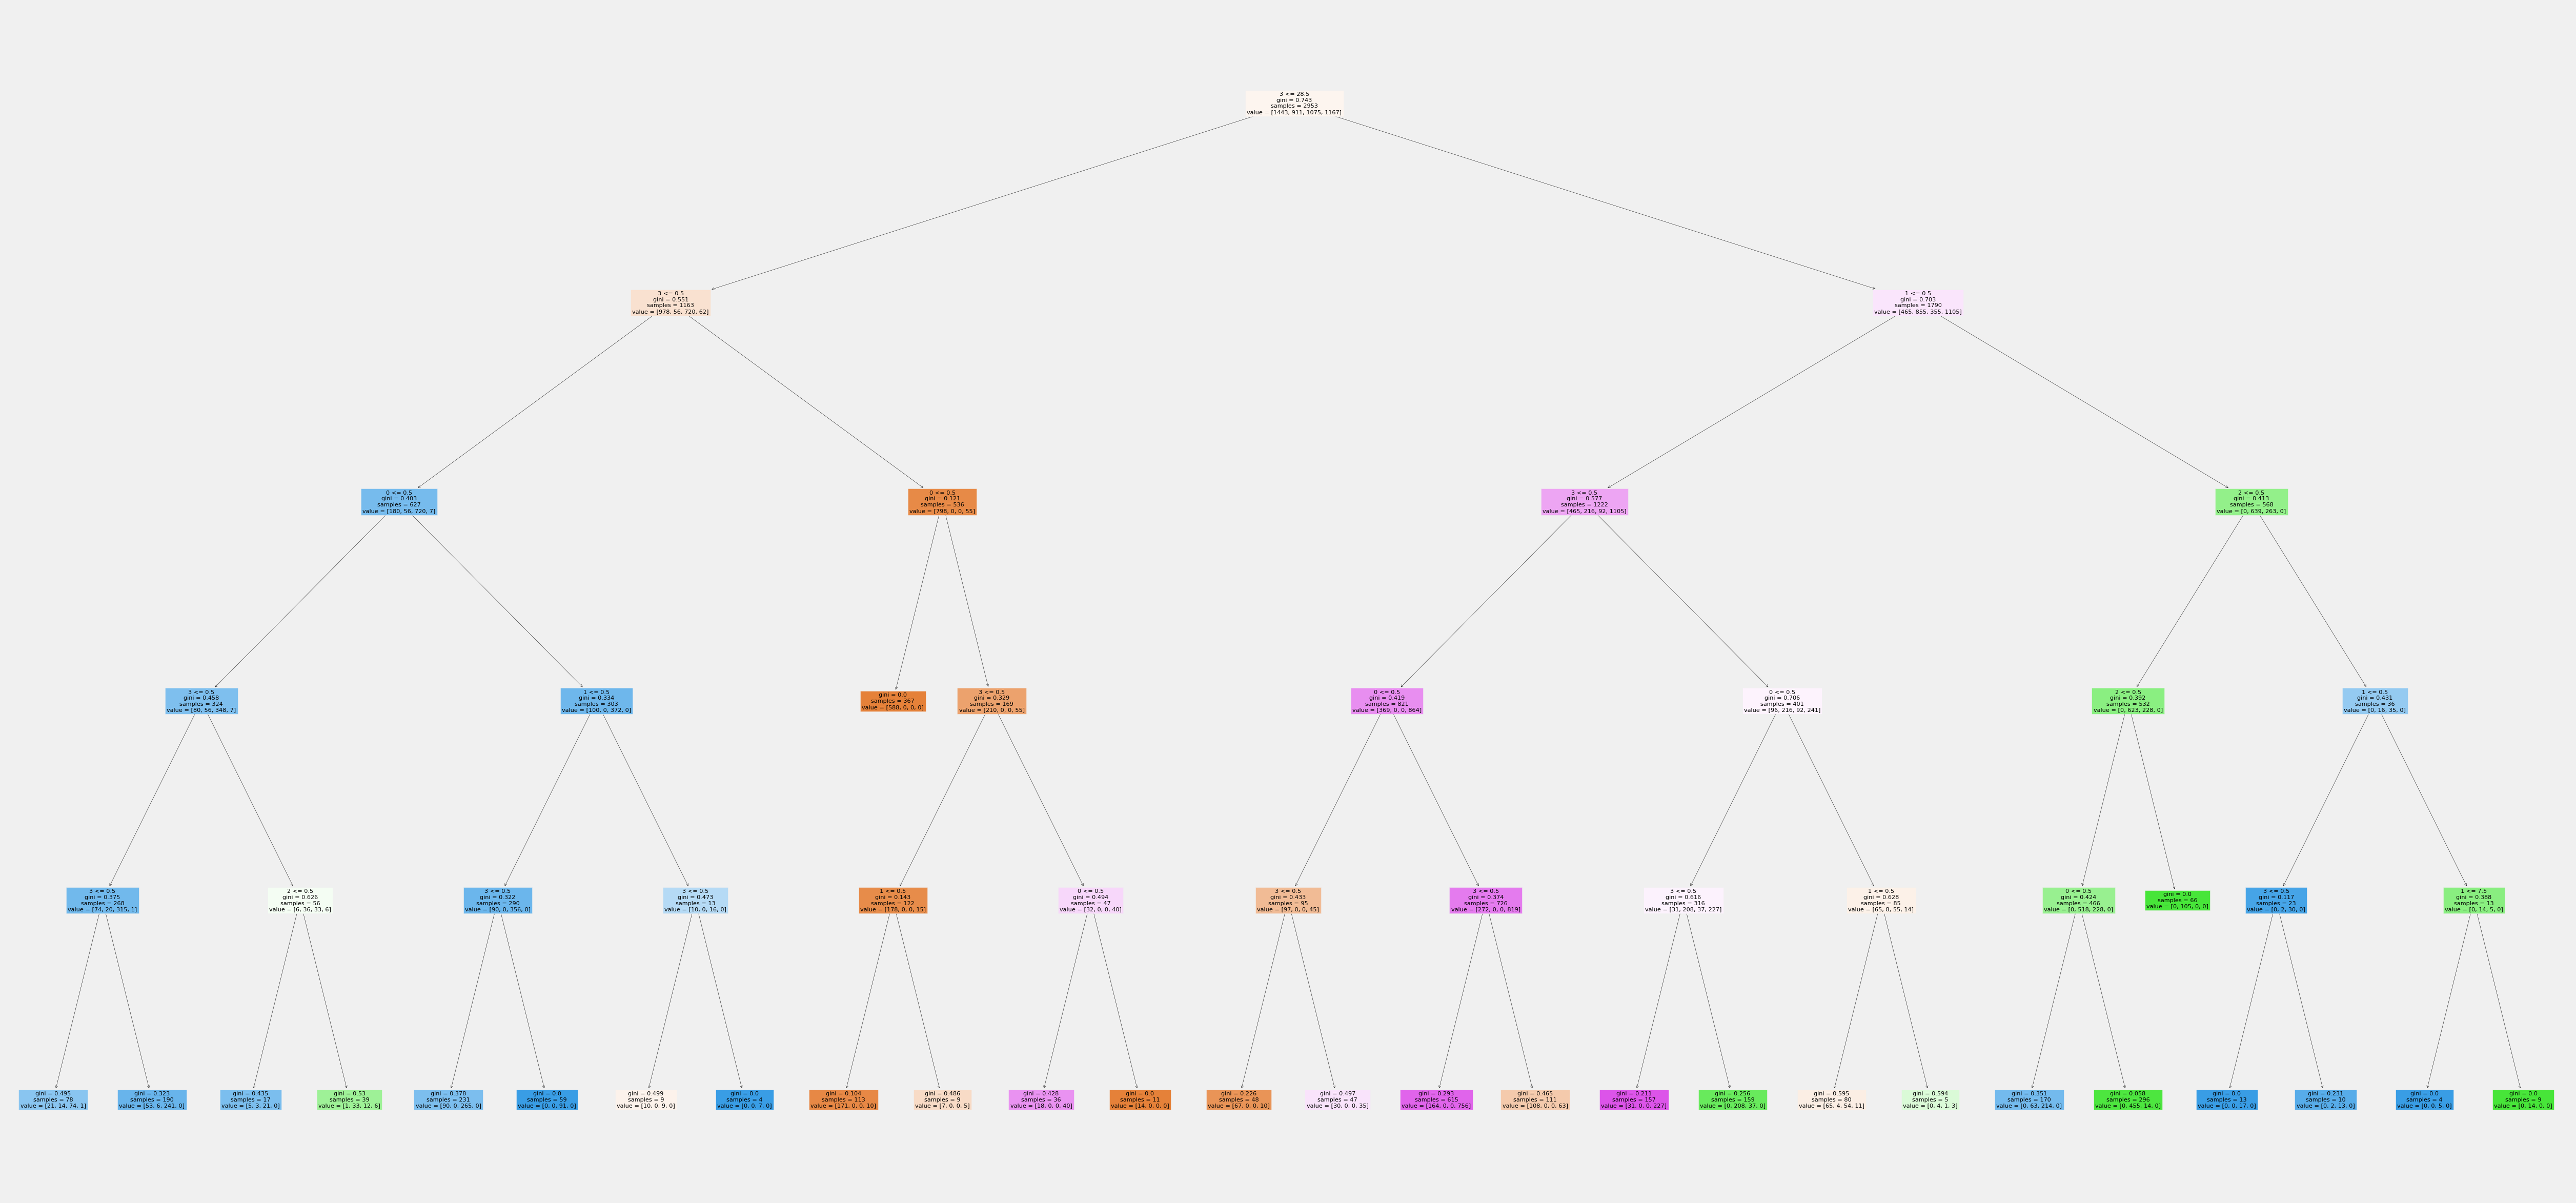

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(classifier_rf.estimators_[5], feature_names = clustered_all['CLUSTER_ID'],filled=True);
print("RANDOM FOREST FOR CLUSTERED_ALL")

In [ ]:
preds_rf = classifier_rf.predict(X_test)
preds_rf

array([2, 0, 0, ..., 0, 1, 2])

In [ ]:
preds_rf = pd.DataFrame(preds_rf)
#preds_rf

In [ ]:
# READING OUT TO CSV SO THAT i CAN RE-IMPORT IF NEEDED

#pd.read_csv('data.csv')  
preds_rf.to_csv('/content/drive/MyDrive/Colab Notebooks/SKIING/Ski_Climate/rf_prediction_array_noindex.csv', index=False)

In [ ]:
acc_rf_score = classifier_rf.score(X_test, y_test)
acc_rf_score

0.9191304347826087

In [ ]:
# CLASSIFICATION FOR RF
print(classification_report(y_test, preds_rf))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       350
           1       0.97      0.87      0.92       253
           2       0.88      0.98      0.93       266
           3       0.98      0.83      0.90       281

    accuracy                           0.92      1150
   macro avg       0.93      0.91      0.92      1150
weighted avg       0.93      0.92      0.92      1150



In [ ]:
#CROSS VAL FOR RANDOM FOREST
from sklearn.model_selection import cross_val_score,KFold

kf=KFold(n_splits=5)
xv_rf = cross_val_score(classifier_rf,X,y,cv=kf) #X and y are the 860 splits
print("Cross Validation Scores are {}".format(xv_rf))
print("Average Cross Validation score: {}".format(xv_rf.mean()))
xv_rf_score = xv_rf.mean()

Cross Validation Scores are [0.92434783 0.92254134 0.9329852  0.91470844 0.91906005]
Average Cross Validation score: 0.9227285730502895


In [ ]:
# FEATURE IMPORTANCE**

classifier_rf.feature_importances_

array([2.95204636e-04, 1.97847928e-03, 1.82842529e-02, 1.12463726e-01,
       1.82249436e-01, 1.71015497e-02, 1.94146817e-02, 4.30374001e-05,
       0.00000000e+00, 6.08696273e-02, 5.07336114e-03, 2.52797189e-02,
       3.77015274e-02, 5.11279826e-02, 2.71701560e-04, 9.58799874e-05,
       8.76095782e-06, 4.35488779e-04, 6.44167633e-04, 7.20721040e-04,
       2.29265998e-04, 7.78772030e-05, 3.20044679e-04, 3.68564233e-05,
       0.00000000e+00, 7.92292855e-05, 1.13743110e-04, 2.60171689e-03,
       5.47873132e-02, 4.77034125e-04, 2.18996639e-03, 2.36258394e-03,
       5.16999137e-04, 6.49284814e-04, 5.69869389e-04, 1.29413510e-03,
       1.48207455e-04, 5.59385228e-03, 1.90584318e-04, 5.68736504e-02,
       2.67175168e-03, 0.00000000e+00, 2.23059060e-02, 6.75918897e-04,
       2.47371152e-02, 7.64225654e-04, 2.33121719e-02, 2.14778951e-01,
       0.00000000e+00, 5.76181744e-03, 1.82338012e-03, 5.33479838e-04,
       1.67675550e-03, 1.76521018e-03, 5.87071141e-04, 1.07374763e-03,
      

In [ ]:
imp_df = pd.DataFrame({
    "Feature/Condition": X_train.columns,
    "Importance": (classifier_rf.feature_importances_)*100
})

In [ ]:
imp_df.sort_values(by="Importance", ascending=False)

,Feature/Condition,Importance
47,COUPLE_WCHILD,21.477895
4,QUE_10,18.224944
3,QUE_5,11.246373
9,P250,6.086963
39,WORK_FULL_TIME,5.687365
28,AGE,5.478731
13,P650,5.112798
12,P550,3.770153
11,P450,2.527972
44,SINGLE,2.473712


# RANDOM FOREST SCORES LOOK GREAT. LOW 90s - VERY GOOD

* Cross validation scores confirm low 90s as well
* OOB score low 90s as well
* Accuracy score low 90s as well

WHY Random Forest:
* RF handles complex variable relationships (ie possible data leakage)
* Includes Feature Importance measurement
* Aggregates results of several decision trees
* Handles both categorical and continuous data (which I have with features like distance and age as well as a majority of categorical 0/1s)
* Good for high dimensional data (ie 87 columns)

<font color = ' red'>**OBJECTIVE: <br>CAN WE PREDICT WHAT FEATURES ARE ASSIGNED TO 4 CLUSTERS THAT CAME FROM UNSUPERVISED LEARNING?** </font>

**YES, WITH ABOUT 90% ACCURACY THIS RANDOM FOREST MODEL WILL PREDICT CLUSTER FEATURES.**


In [ ]:
clustered_all.columns

Index(['CLUSTER_ID', 'SLOPES_OPEN', 'RATING', 'QUE_1', 'QUE_5', 'QUE_10',
       'MIDWEEK', 'WEEKEND', 'REGULAR_WEEK', 'VACATION', 'P250', 'P350',
       'P450', 'P550', 'P650', 'SUN', 'RAIN', 'SNOW', 'CLOUD', 'FOG', 'TEMP_C',
       'NO_WIND', 'GENTLE_BREEZE', 'FRESH_BREEZE', 'SLOPES_50', 'SLOPES_75',
       'SLOPES_100', 'MALE', 'FEMALE', 'AGE', 'HAFJELL_RESIDENCE',
       'SKIING_DAYS_TOTAL', 'SKIING_DAYS_HAFJELL', 'SKIING_MIDWEEK',
       'SKIING_WEEKEND', 'SKIING_CHRISTMAS', 'SKIING_EASTER',
       'SKIING_WINTER-VACATION', 'SKIING_REGULAR_WEEK', 'SKIING_ALL_PERIODS',
       'WORK_FULL_TIME', 'WORK_PART_TIME', 'WORK_UNEMPLOYED', 'WORK_STUDENT',
       'WORK_OTHER', 'SINGLE', 'SINGLE_WCHILD', 'COUPLE', 'COUPLE_WCHILD',
       'OTHER', 'DISTANCE', 'ANC_SKI_RENT', 'ANC_RESTAURANTS', 'ANC_SKISCHOOL',
       'ANC_CHILD_ACTIVITIES', 'ANC_SPORT_STORE', 'GEAR_ALPIN_SKI',
       'GEAR_SNOWBOARD', 'GEAR_OTHER', 'INCOME_L100', 'INCOME_100-300',
       'INCOME_300-600', 'INCOME_600-900', 'INC

# <FONT COLOR='BLUE'> VISUALIZING  and INTERPRETING CLUSTER FEATURES </FONT>

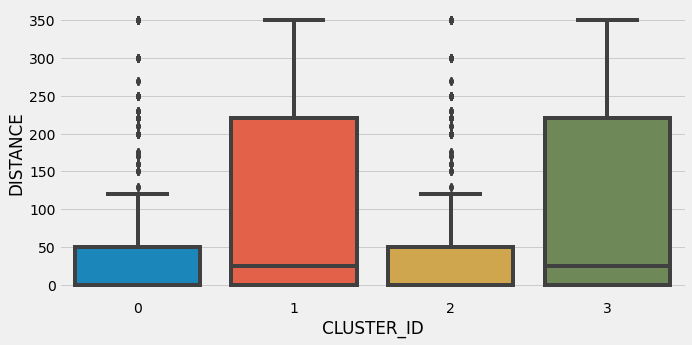

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='CLUSTER_ID', y="DISTANCE", data = clustered_all)


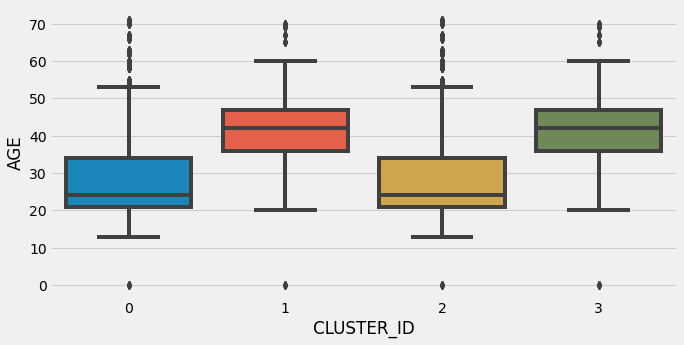

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='CLUSTER_ID', y="AGE", data = clustered_all)

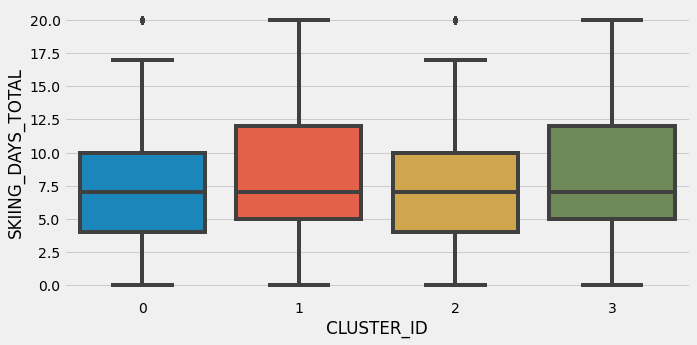

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='CLUSTER_ID', y="SKIING_DAYS_TOTAL", data = clustered_all)

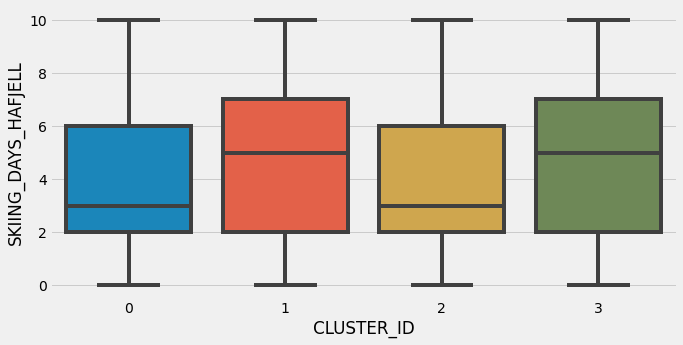

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='CLUSTER_ID', y="SKIING_DAYS_HAFJELL", data = clustered_all)

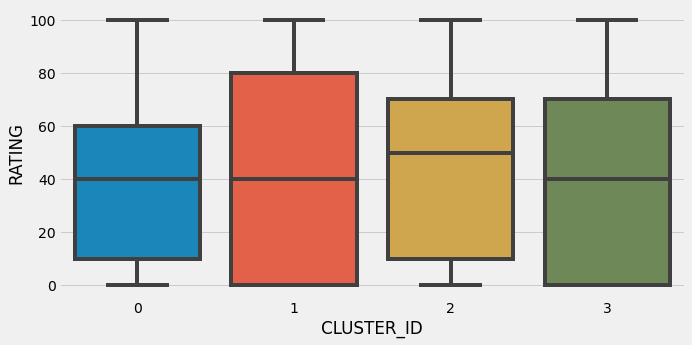

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='CLUSTER_ID', y="RATING", data = clustered_all)

In [ ]:
lgcolors = {'magenta','cyan','yellow','gray','maroon','orange','lime','green','royalblue','darkorchid'}

In [ ]:
plt.style.use("fivethirtyeight")

Text(0.5, 1.0, 'CLUSTER ID WITH MIDWEEK')

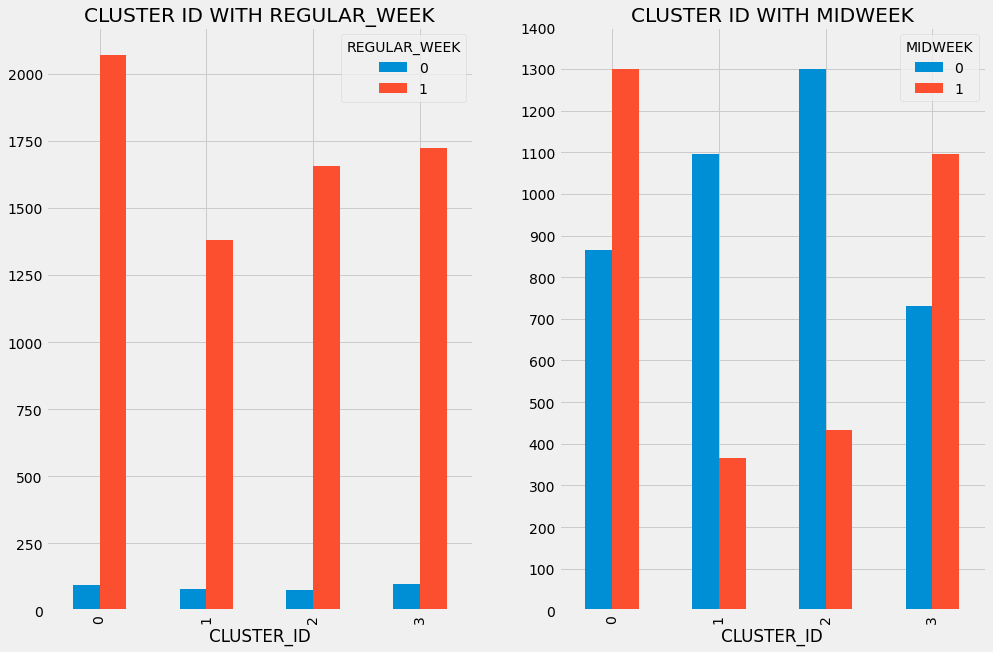

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,20))

pd.crosstab(clustered_all['CLUSTER_ID'], clustered_all['REGULAR_WEEK']).plot(kind='bar', ax=ax1,stacked=False, figsize=(15,10))
plt.yticks(np.arange(0.00, 1000, step=100))
ax1.set_title("CLUSTER ID WITH REGULAR_WEEK")

pd.crosstab(clustered_all['CLUSTER_ID'], clustered_all['MIDWEEK']).plot(kind='bar', ax=ax2,stacked=False, figsize=(15,10))
plt.yticks(np.arange(0.00, 1500, step=100))
ax2.set_title("CLUSTER ID WITH MIDWEEK")


Text(0.5, 1.0, 'CLUSTER ID WITH WEEKEND')

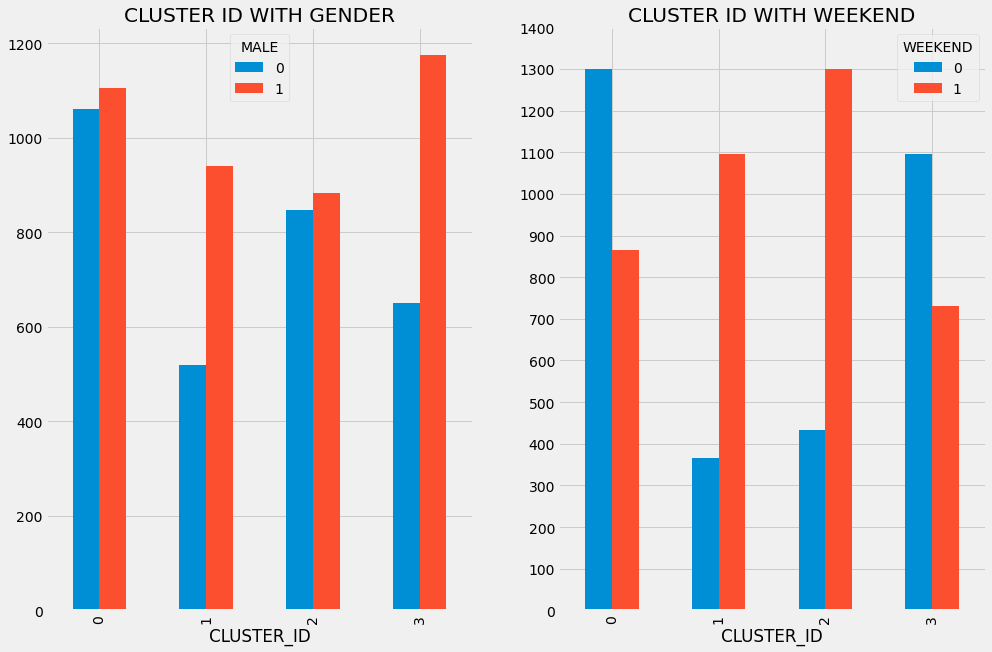

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,20))

pd.crosstab(clustered_all['CLUSTER_ID'], clustered_all['MALE']).plot(kind='bar', ax=ax1,stacked=False, figsize=(15,10))
plt.yticks(np.arange(0.00, 1000, step=100))
ax1.set_title("CLUSTER ID WITH GENDER")

pd.crosstab(clustered_all['CLUSTER_ID'], clustered_all['WEEKEND']).plot(kind='bar', ax=ax2,stacked=False, figsize=(15,10))
plt.yticks(np.arange(0.00, 1500, step=100))
ax2.set_title("CLUSTER ID WITH WEEKEND")

In [ ]:
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)

Text(0.5, 1.0, 'CLUSTER ID WITH SKI INTEREST')

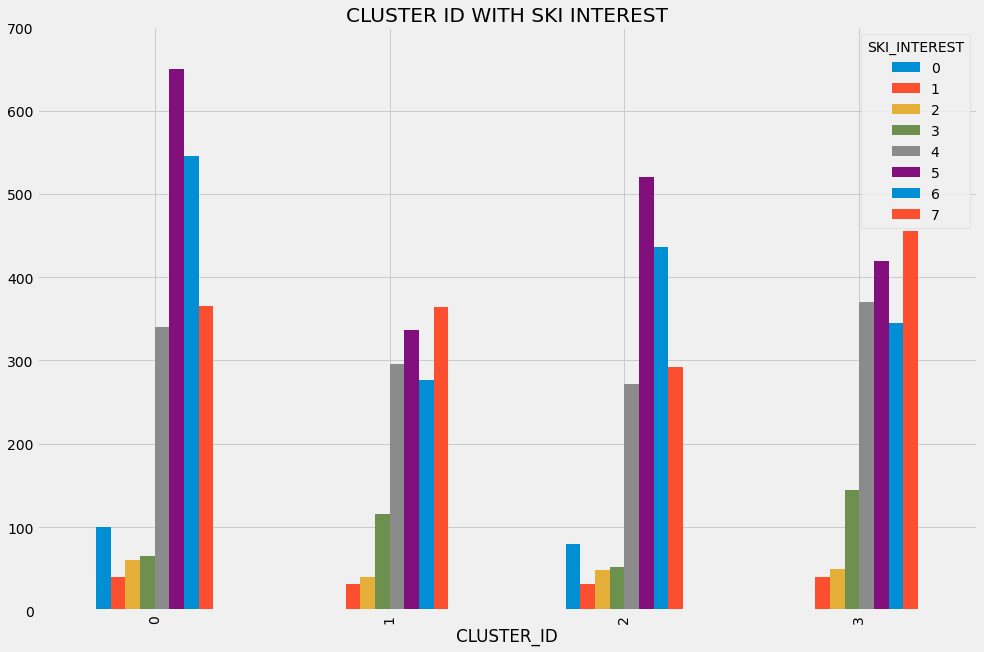

In [ ]:
pd.crosstab(clustered_all['CLUSTER_ID'], clustered_all['SKI_INTEREST'] ).plot(kind='bar',stacked=False, figsize=(15,10) ) #color = lgcolors
plt.yticks(np.arange(0.00, 800, 100))
#ax1.set_title("CLUSTER ID WITH SKI INTEREST")
plt.title("CLUSTER ID WITH SKI INTEREST")

Text(0.5, 1.0, 'CLUSTER ID WITH INCOME')

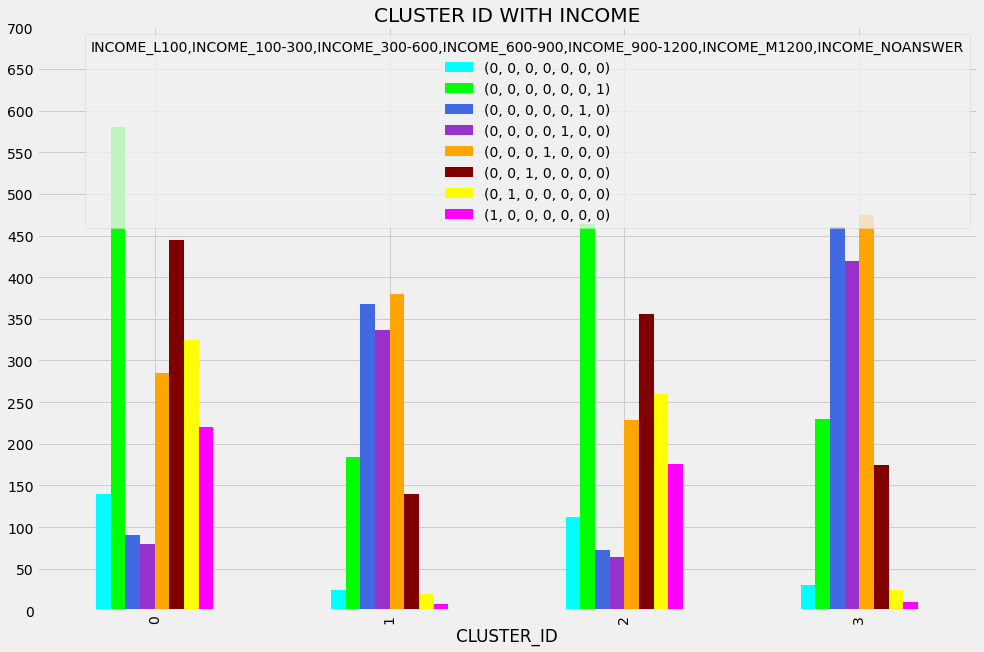

In [ ]:
pd.crosstab(clustered_all['CLUSTER_ID'], [clustered_all['INCOME_L100'],clustered_all['INCOME_100-300'],clustered_all['INCOME_300-600'],clustered_all['INCOME_600-900'],clustered_all['INCOME_900-1200'],clustered_all['INCOME_M1200'],clustered_all['INCOME_NOANSWER'] ]).plot(kind='bar',stacked=False, figsize=(15,10), color = lgcolors)
plt.yticks(np.arange(0.00, 750, 50))
plt.title("CLUSTER ID WITH INCOME")
#, color = lgcolors

Text(0.5, 1.0, "\nCLUSTER ID WITH 'COUPLE WITH CHILD' vs 'SINGLE' vs 'COUPLE' vs 'SINGLE WITH CHILD' vs 'OTHER'")

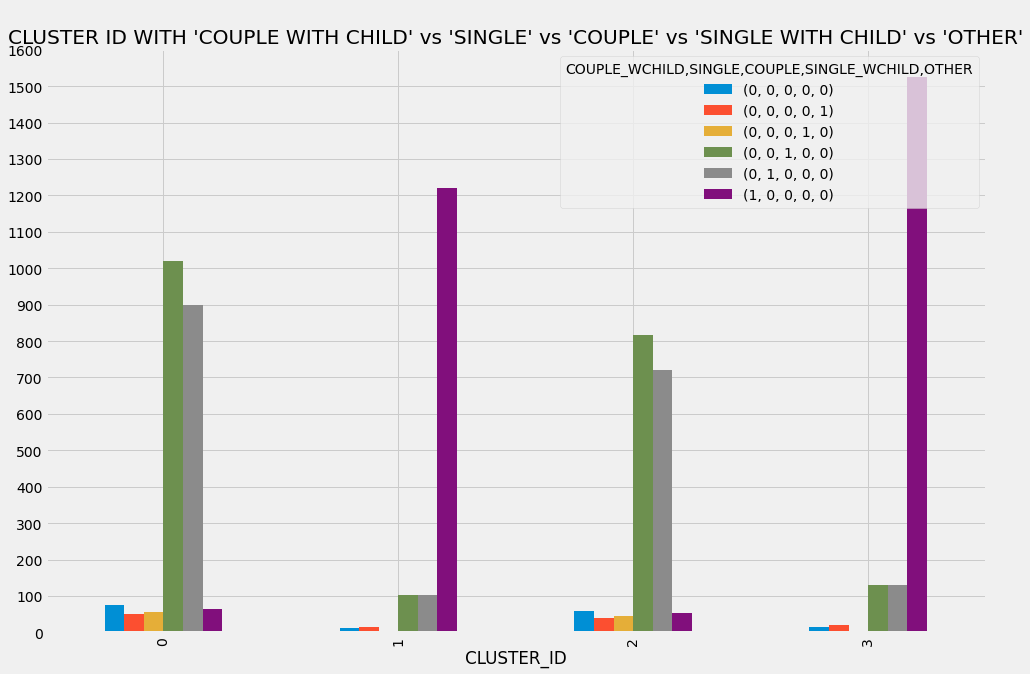

In [ ]:
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,20))

pd.crosstab(clustered_all['CLUSTER_ID'], [clustered_all['COUPLE_WCHILD'], clustered_all['SINGLE'], clustered_all['COUPLE'],clustered_all['SINGLE_WCHILD'], clustered_all['OTHER']]).plot(kind='bar' ,stacked=False, figsize=(15,10))
plt.yticks(np.arange(0.00,1700, 100))
plt.title("\nCLUSTER ID WITH 'COUPLE WITH CHILD' vs 'SINGLE' vs 'COUPLE' vs 'SINGLE WITH CHILD' vs 'OTHER'")

# legend: 0,0 - means 0 for couple_wchild, 0 for single
# 0,0,0 - no couple with child, not single, not SWC - BLUE --> LG: 'SINGLE SOLO SKIERS'
# 0,0,1 - not CWC, not single, yes SWC - ORANGE
# 0,1,0 - no couple with child, yes single, not SWC - YELLOW
# 1,0,0 - couple with child, not single, not SWC - GREEN


Text(0.5, 1.0, 'CLUSTER ID WITH SLOPES OPEN')

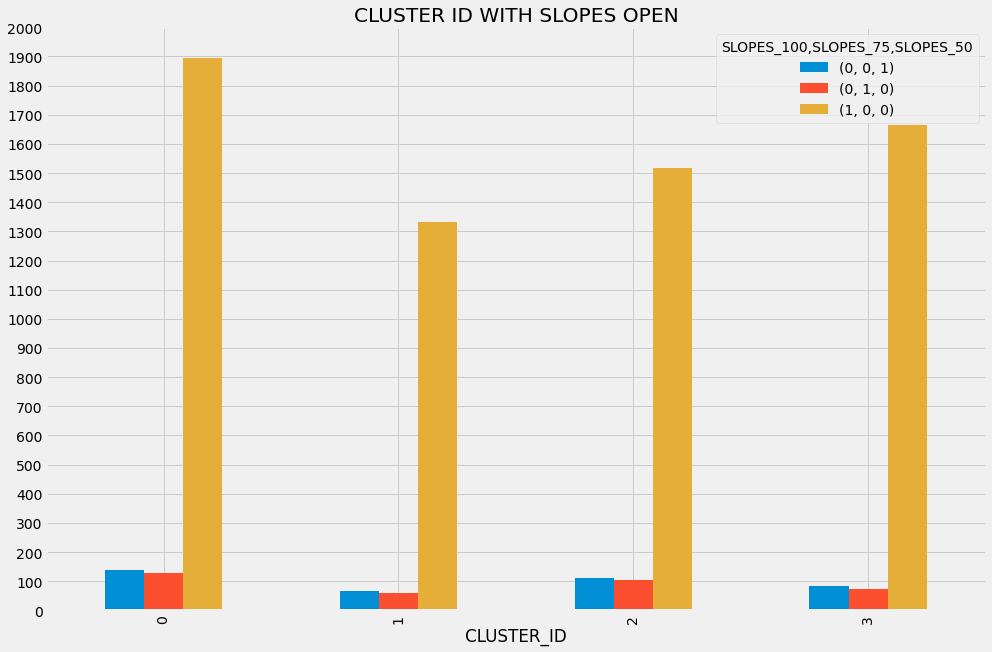

In [ ]:
pd.crosstab(clustered_all['CLUSTER_ID'], [clustered_all['SLOPES_100'], clustered_all['SLOPES_75'], clustered_all['SLOPES_50']]).plot(kind='bar',stacked=False, figsize=(15,10))
plt.yticks(np.arange(0.00,2100, 100))
plt.title("CLUSTER ID WITH SLOPES OPEN")

Text(0.5, 1.0, 'CLUSTER ID WITH QUE TIME')

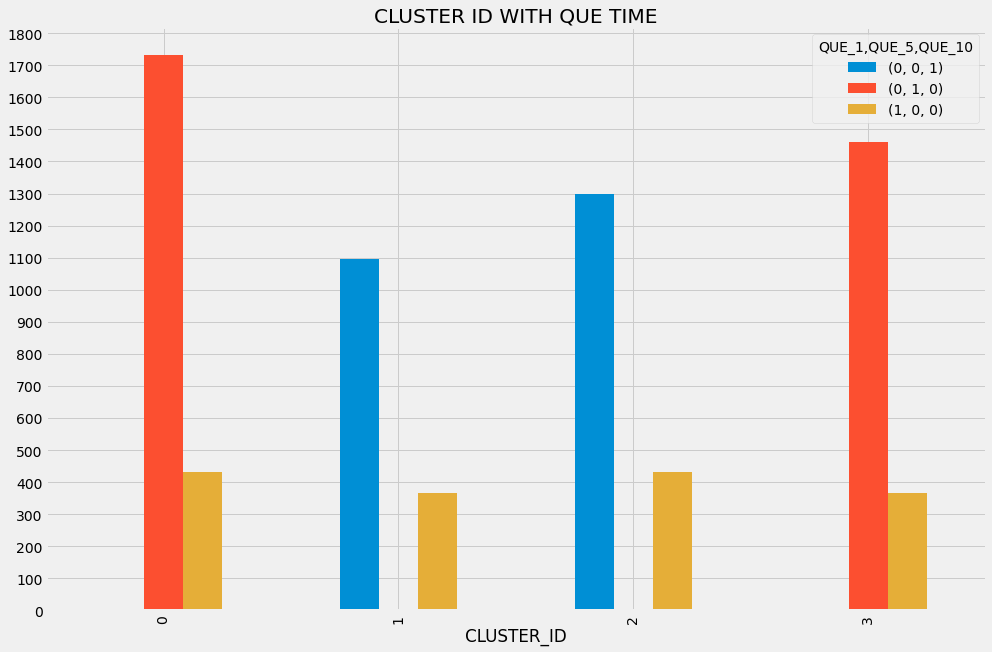

In [ ]:
pd.crosstab(clustered_all['CLUSTER_ID'], [clustered_all['QUE_1'], clustered_all['QUE_5'], clustered_all['QUE_10']]).plot(kind='bar',stacked=False, figsize=(15,10))
plt.yticks(np.arange(0.00,1900, 100))
plt.title("CLUSTER ID WITH QUE TIME")

Text(0.5, 1.0, 'CLUSTER ID WITH PRICE')

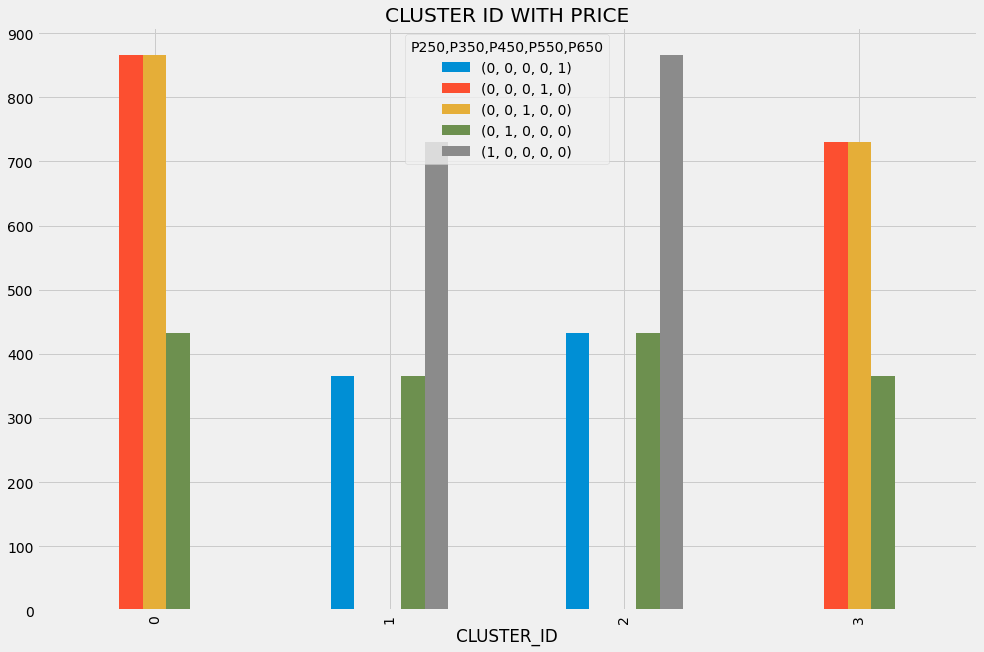

In [ ]:
pd.crosstab(clustered_all['CLUSTER_ID'], [clustered_all['P250'], clustered_all['P350'], clustered_all['P450'],clustered_all['P550'],clustered_all['P650']]).plot(kind='bar',stacked=False, figsize=(15,10))
plt.yticks(np.arange(0.00,1000, 100))
plt.title("CLUSTER ID WITH PRICE")


Text(0.5, 1.0, 'CLUSTER ID WITH TEMP_C, SNOW, SUN')

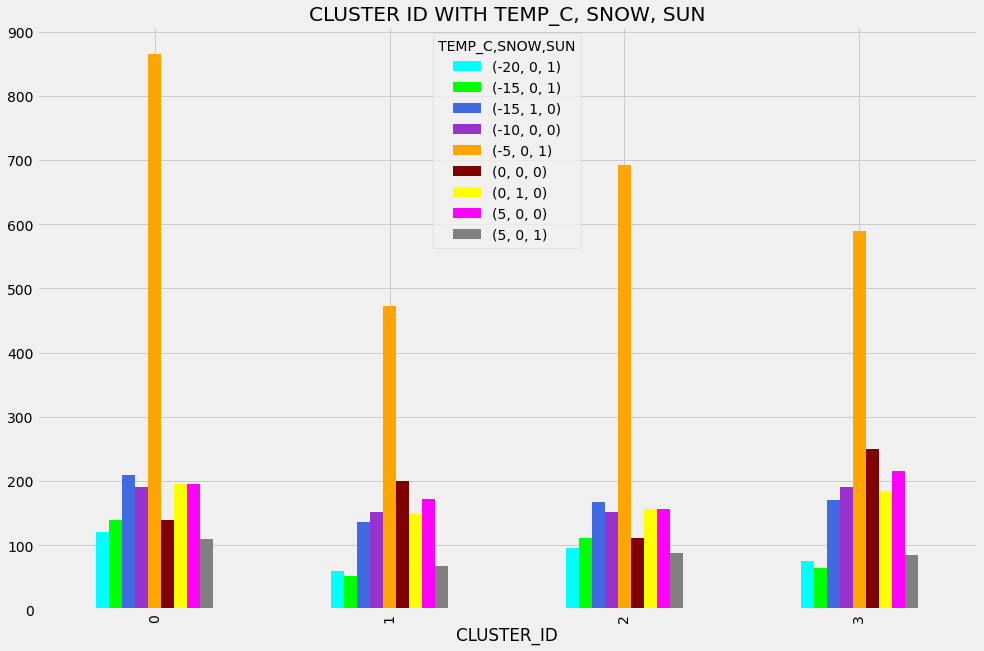

In [ ]:
pd.crosstab(clustered_all['CLUSTER_ID'], [clustered_all['TEMP_C'], clustered_all['SNOW'], clustered_all['SUN']]).plot(kind='bar',stacked=False, figsize=(15,10) , color=lgcolors) #, color=lgcolors
plt.yticks(np.arange(0.00,1000, 100))
plt.title("CLUSTER ID WITH TEMP_C, SNOW, SUN")

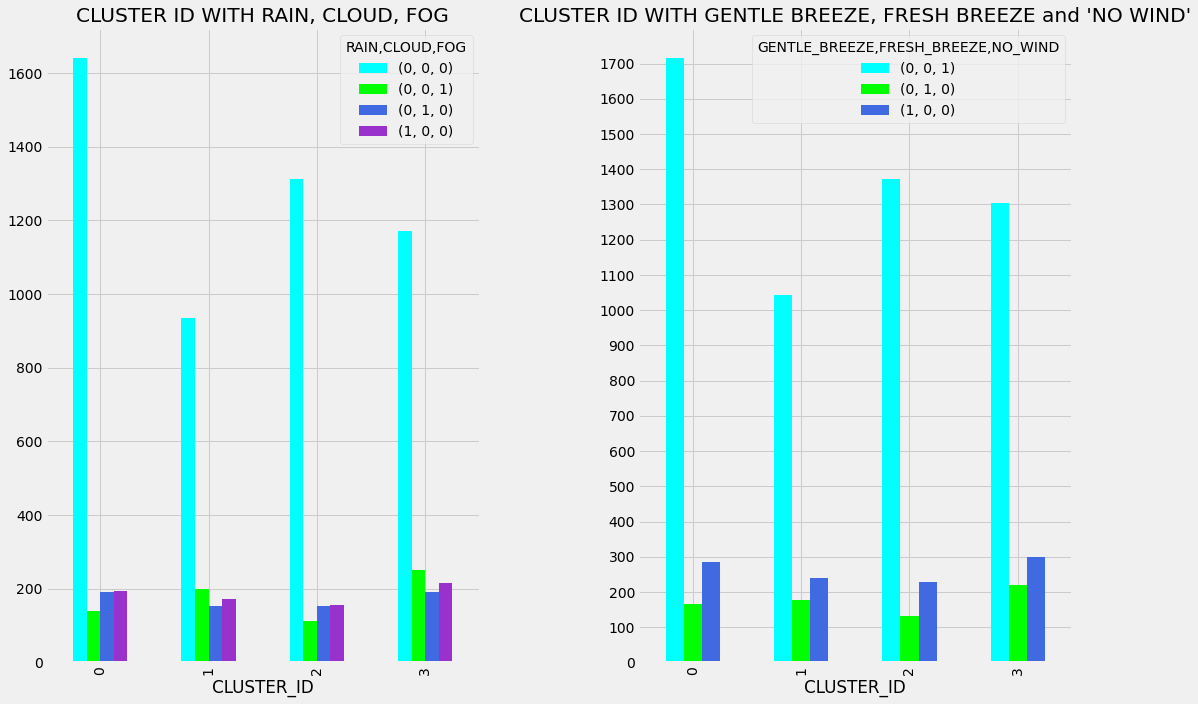

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,20))

pd.crosstab(clustered_all['CLUSTER_ID'], [clustered_all['RAIN'],clustered_all['CLOUD'],clustered_all['FOG']]).plot(kind='bar',stacked=False, figsize=(15,10) , color=lgcolors, ax=ax1) #, color=lgcolors
plt.yticks(np.arange(0.00,2000, 100))
ax1.set_title("CLUSTER ID WITH RAIN, CLOUD, FOG")

pd.crosstab(clustered_all['CLUSTER_ID'], [clustered_all['GENTLE_BREEZE'],clustered_all['FRESH_BREEZE'], clustered_all['NO_WIND']]).plot(kind='bar',stacked=False, figsize=(15,10), ax=ax2, color=lgcolors) #, color=lgcolors
plt.yticks(np.arange(0.00,1800, 100))
ax2.set_title("CLUSTER ID WITH GENTLE BREEZE, FRESH BREEZE and 'NO WIND'")

plt.tight_layout()
plt.subplots_adjust(right=1)

Text(0.5, 1.0, "CLUSTER ID WITH GENTLE BREEZE, FRESH BREEZE and 'NO WIND'")

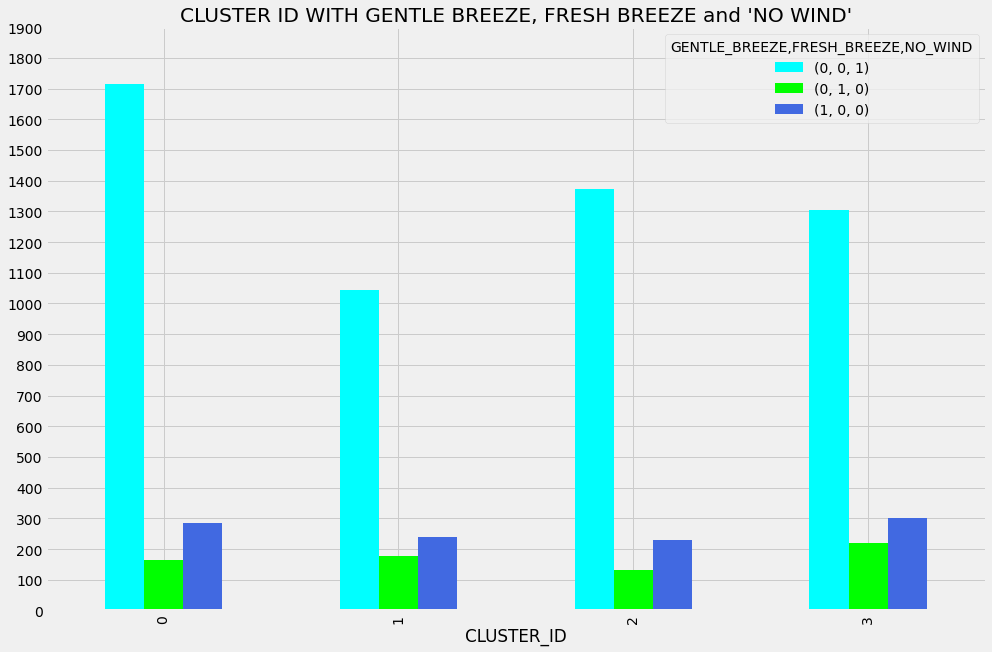

In [ ]:
pd.crosstab(clustered_all['CLUSTER_ID'], [clustered_all['GENTLE_BREEZE'],clustered_all['FRESH_BREEZE'], clustered_all['NO_WIND']]).plot(kind='bar',stacked=False, figsize=(15,10) , color=lgcolors) #, color=lgcolors
plt.yticks(np.arange(0.00,2000, 100))
plt.title("CLUSTER ID WITH GENTLE BREEZE, FRESH BREEZE and 'NO WIND'")


In [ ]:
# these are multi numbered - dont graph well in this format

# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,20))

# pd.crosstab(clustered_all['CLUSTER_ID'], [clustered_all['HAFJELL_RESIDENCE'],clustered_all['SKIING_DAYS_TOTAL']]).plot(kind='bar',stacked=False, figsize=(15,10) , color=lgcolors, ax=ax1) #, color=lgcolors
# plt.yticks(np.arange(0.00,1000, 100))
# ax1.set_title("CLUSTER ID WITH HAF RESIDENT AND SKI DAYS TOTAL")

# pd.crosstab(clustered_all['CLUSTER_ID'], [clustered_all['SKIING_DAYS_HAFJELL'],clustered_all['DISTANCE']]).plot(kind='bar',stacked=False, figsize=(15,10), ax=ax2, color=lgcolors) #, color=lgcolors
# plt.yticks(np.arange(0.00,1000, 100))
# ax2.set_title("CLUSTER ID WITH SKI DAYS HAF AND DISTANCE")

# plt.tight_layout()
# plt.subplots_adjust(right=1)

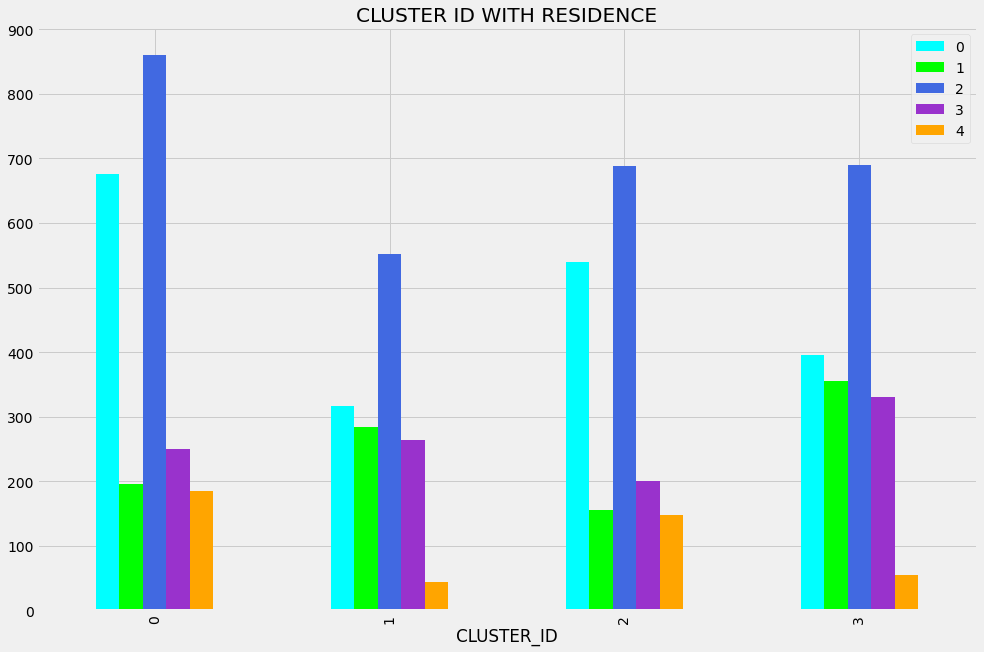

In [ ]:
pd.crosstab(clustered_all['CLUSTER_ID'], [clustered_all['HAFJELL_RESIDENCE']]).plot(kind='bar',stacked=False, figsize=(15,10) , color=lgcolors) #, color=lgcolors
plt.yticks(np.arange(0.00,1000, 100))
plt.title("CLUSTER ID WITH RESIDENCE")
plt.legend(loc='best')

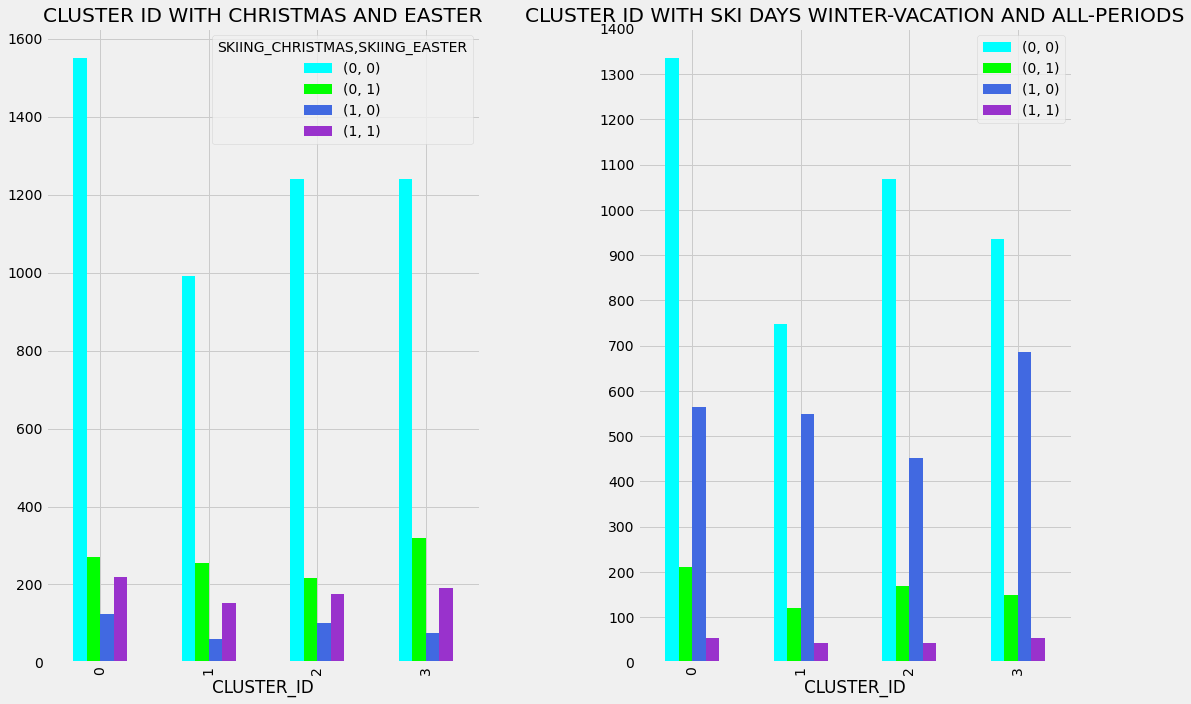

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,20))

pd.crosstab(clustered_all['CLUSTER_ID'], [clustered_all['SKIING_CHRISTMAS'],clustered_all['SKIING_EASTER']]).plot(kind='bar',stacked=False, figsize=(15,10) , color=lgcolors, ax=ax1) #, color=lgcolors
plt.yticks(np.arange(0.00,1000, 100))
ax1.set_title("CLUSTER ID WITH CHRISTMAS AND EASTER")

pd.crosstab(clustered_all['CLUSTER_ID'], [clustered_all['SKIING_WINTER-VACATION'],clustered_all['SKIING_ALL_PERIODS']]).plot(kind='bar',stacked=False, figsize=(15,10), ax=ax2, color=lgcolors) #, color=lgcolors
plt.yticks(np.arange(0.00,1500, 100))
ax2.set_title("CLUSTER ID WITH SKI DAYS WINTER-VACATION AND ALL-PERIODS")

plt.tight_layout()
plt.subplots_adjust(right=1)
plt.legend(loc='best')

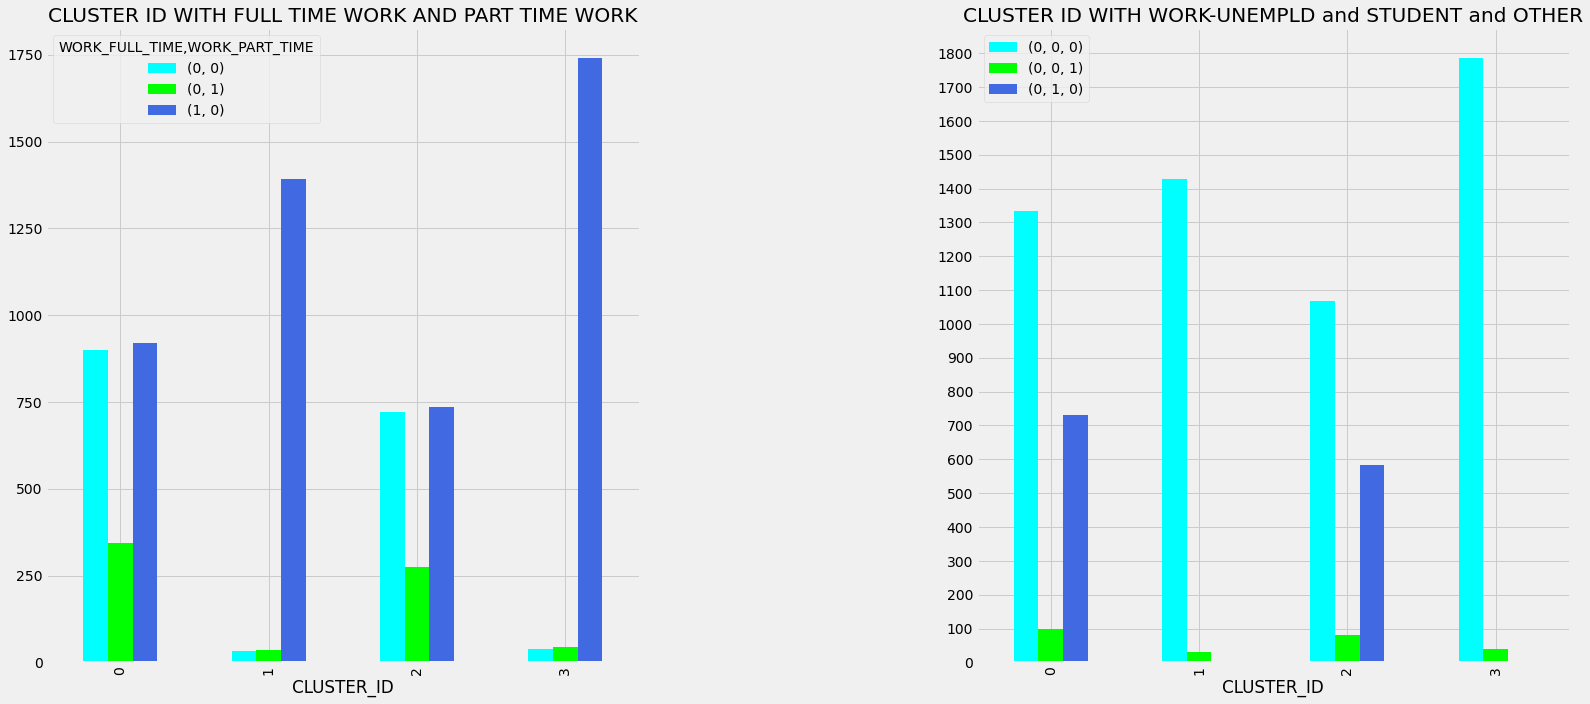

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,20))

pd.crosstab(clustered_all['CLUSTER_ID'], [clustered_all['WORK_FULL_TIME'],clustered_all['WORK_PART_TIME']]).plot(kind='bar',stacked=False, figsize=(15,10) , color=lgcolors, ax=ax1) #, color=lgcolors
plt.yticks(np.arange(0.00,1900, 100))
ax1.set_title("CLUSTER ID WITH FULL TIME WORK AND PART TIME WORK")

pd.crosstab(clustered_all['CLUSTER_ID'], [clustered_all['WORK_UNEMPLOYED'],clustered_all['WORK_STUDENT'],clustered_all['WORK_OTHER']]).plot(kind='bar',stacked=False, figsize=(15,10), ax=ax2, color=lgcolors) #, color=lgcolors
plt.yticks(np.arange(0.00,1900, 100))
ax2.set_title("CLUSTER ID WITH WORK-UNEMPLD and STUDENT and OTHER")
ax2.legend(loc='best')

plt.tight_layout()
plt.subplots_adjust(right=1.5)
plt.legend(loc='best')

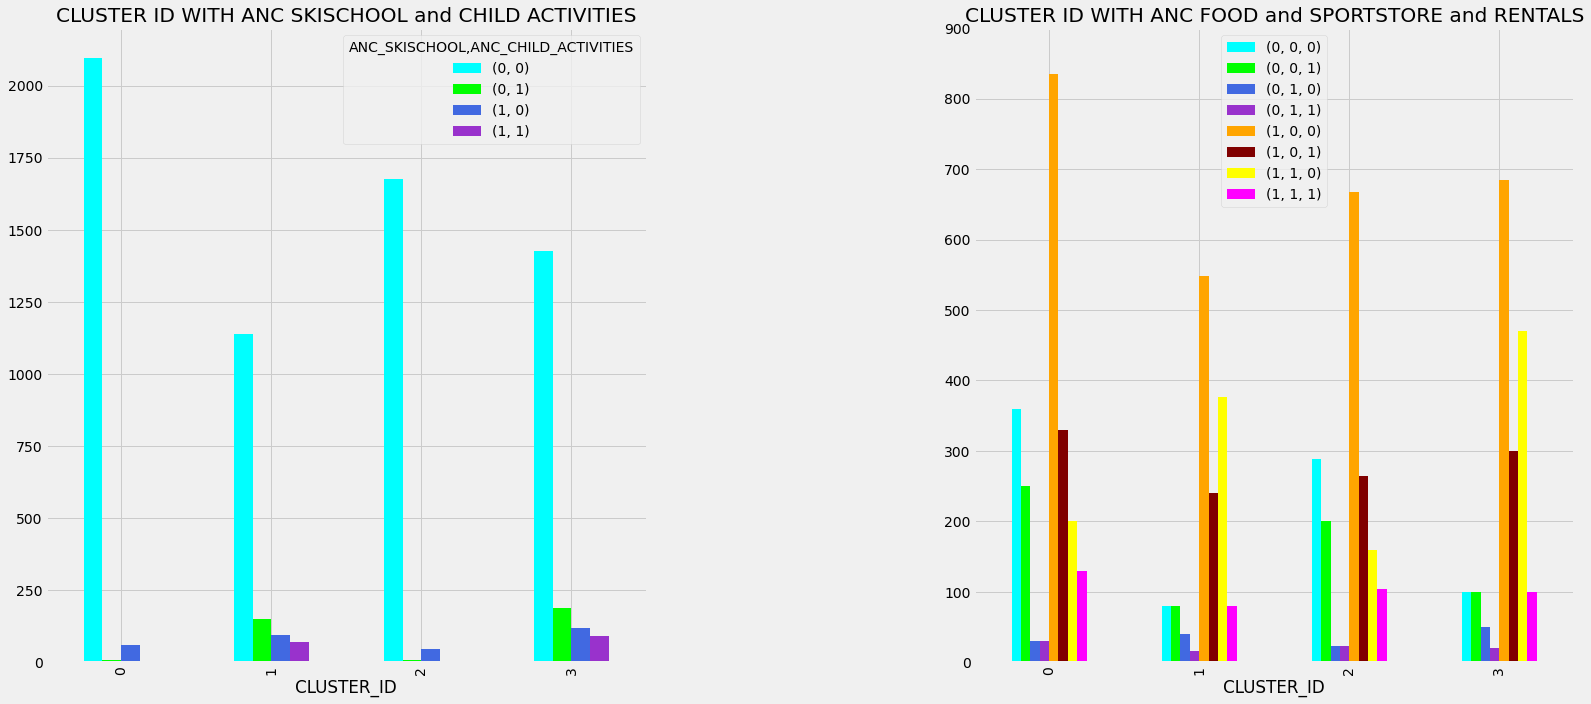

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,20))

pd.crosstab(clustered_all['CLUSTER_ID'], [clustered_all['ANC_SKISCHOOL'],clustered_all['ANC_CHILD_ACTIVITIES']]).plot(kind='bar',stacked=False, figsize=(15,10) , color=lgcolors, ax=ax1) #, color=lgcolors
plt.yticks(np.arange(0.00,2200, 100))
ax1.set_title("CLUSTER ID WITH ANC SKISCHOOL and CHILD ACTIVITIES")

pd.crosstab(clustered_all['CLUSTER_ID'], [clustered_all['ANC_RESTAURANTS'],clustered_all['ANC_SPORT_STORE'],clustered_all['ANC_SKI_RENT']]).plot(kind='bar',stacked=False, figsize=(15,10), ax=ax2, color=lgcolors) #, color=lgcolors
plt.yticks(np.arange(0.00,1000, 100))
ax2.set_title("CLUSTER ID WITH ANC FOOD and SPORTSTORE and RENTALS")


plt.tight_layout()
plt.subplots_adjust(right=1.5)
plt.legend(loc='best')

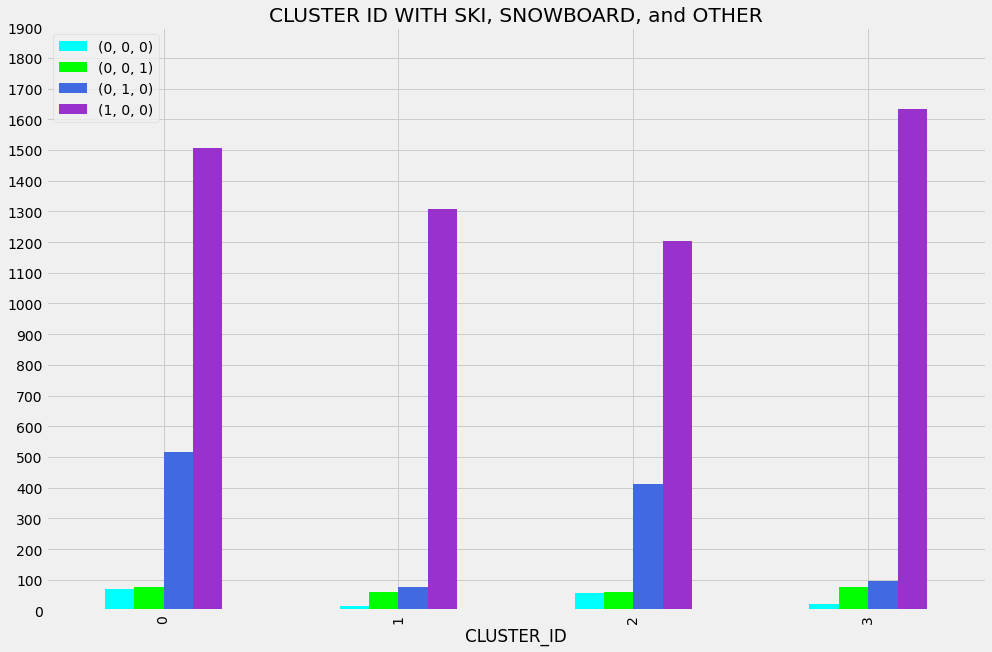

In [ ]:
pd.crosstab(clustered_all['CLUSTER_ID'], [clustered_all['GEAR_ALPIN_SKI'],clustered_all['GEAR_SNOWBOARD'], clustered_all['GEAR_OTHER']]).plot(kind='bar',stacked=False, figsize=(15,10) , color=lgcolors) #, color=lgcolors
plt.yticks(np.arange(0.00,2000, 100))
plt.title("CLUSTER ID WITH SKI, SNOWBOARD, and OTHER")
plt.legend(loc='best')